

## 🎯 **Project Goals / Analysis Questions**

---

### 📍 **Geographic Insights**

1. **Which countries/cities have the most restaurants listed?**
2. **What are the top cities by number of highly-rated restaurants (rating ≥ 4)?**
4. **Are there cities where average cost is higher than others?**
5. **Which countries have the best-rated restaurants on average?**
6. **Where are restaurants with the most votes located?**

---

### 🍽️ **Cuisine-Based Analysis**

7. **What are the top 10 most common cuisines across the platform?**
8. **Which cuisines get the highest average ratings globally or in India?**
9. **Is there a cuisine with low average cost and high rating — value for money?**

---

### ⭐ **Ratings & Reviews**

12. **What is the distribution of restaurant ratings?**
13. **What percentage of restaurants are unrated (rating = 0)?**
14. **Do high-rated restaurants tend to have more votes?**
15. **Do restaurants with table booking options have higher ratings?**
16. **How do ratings vary by price range?**
17. **Which rating color is most frequent and in which cities?**

---

### 💰 **Price and Cost Analysis**

18. **What is the average cost for two across cities?**
19. **Do expensive restaurants (cost > 1000) get better ratings?**
20. **Which cuisines are the most expensive on average?**
21. **Is there a clear trend between price range (1–4) and rating?**
22. **Which countries have higher price range on average?**

---

### 🛵 **Ordering & Delivery**

23. **How many restaurants offer online delivery?**
24. **Does offering online delivery correlate with higher ratings or votes?**
25. **What is the distribution of restaurants currently delivering (`Is delivering now`)?**
26. **Is there a relationship between delivery availability and cost?**

---

### 🪑 **Table Booking & Dining Experience**

27. **What proportion of restaurants offer table booking?**
28. **Do restaurants with table booking have higher price ranges?**
29. **Are table-booking restaurants more likely to be high-end (rating ≥ 4.5)?**

---

### 📦 **Operational Characteristics**

30. **How does 'Switch to order menu' option affect other features like rating/votes?**
31. **Does the availability of both table booking and online delivery boost rating?**

---

### 📊 **Feature Interactions & Correlations**

32. **Correlation between average cost, votes, and rating**
33. **Cluster restaurants by location and cuisine using KMeans**
34. **Apply PCA to reduce dimensionality and visualize clusters**
35. **Use a heatmap to visualize all feature correlations**

---

### 🧠 **Advanced Ideas (Optional ML/NLP/Geo)**

36. **Build a simple regression model to predict ratings based on features**
37. **Classify restaurants into “High Rated” vs “Low Rated” using classification models**
38. **If text reviews available: Perform sentiment analysis on reviews**
39. **Geo-map restaurant density with `Latitude` & `Longitude`**
40. **Create a recommendation engine based on cuisine, location, and price**

---

## 🔚 Final Deliverables Can Include:

* A clean notebook
* Summary of insights in Markdown
* Visuals: heatmaps, bar plots, pie charts, maps
* Optional: a small ML model or dashboard (Streamlit or Tableau)
* GitHub README with intro, dataset link, questions, insights, and screenshots

---




Here's a detailed list of **feature engineering ideas** for your Zomato dataset, tailored for both **EDA (exploratory analysis)** and **machine learning**.

---

## 🧱 **Feature Engineering Ideas for the Zomato Dataset**

---

### 🔁 **1. Normalize Binary Columns**

Convert these from `"Yes"/"No"` to `1/0`:

* `Has Table booking`
* `Has Online delivery`
* `Is delivering now`
* `Switch to order menu`

```python
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
```

---

### 🧪 **2. Rating Bucket (Categorical Target Feature)**

Create a bucketed version of `Aggregate rating`:

```python
def rating_category(r):
    if r == 0:
        return 'Not Rated'
    elif r < 2:
        return 'Poor'
    elif r < 3.5:
        return 'Average'
    elif r < 4.0:
        return 'Good'
    else:
        return 'Excellent'

df['Rating Category'] = df['Aggregate rating'].apply(rating_category)
```

---

### 💸 **3. Cost per Person**

Derive cost per person from `Average Cost for two`:

```python
df['Cost per person'] = df['Average Cost for two'] / 2
```

---

### 🏷️ **4. Cuisine Count**

Split the `Cuisines` column and count the number of cuisines a restaurant offers:

```python
df['Cuisine Count'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')))
```

---

### 🌍 **5. Location Features**

Extract meaningful location features:

* `City Tier`: Group cities into Tiers (Metro, Tier 2, Tier 3)
* `Country Code` → Map to country names (optional)
* Combine `City + Locality` as a new ID

```python
df['City_Locality'] = df['City'] + " - " + df['Locality']
```

---

### 🎨 **6. Encode Categorical Variables**

Convert text categories into numeric features for modeling:

* Label encoding: `Rating text`, `Currency`, `City`, `Country`
* One-hot encoding: `Price range`, `Rating color`, `Rating text`

---

### ⭐ **7. Votes Binning**

Group restaurants by vote volume:

```python
def vote_level(v):
    if v == 0:
        return 'No Votes'
    elif v <= 50:
        return 'Low'
    elif v <= 200:
        return 'Medium'
    else:
        return 'High'

df['Vote Level'] = df['Votes'].apply(vote_level)
```

---

### 📍 **8. Geohash or Lat-Long Clustering (Advanced)**

Use latitude and longitude to:

* Create a `geohash` or
* Cluster restaurants geographically using `KMeans`

Example:

```python
from sklearn.cluster import KMeans
coords = df[['Latitude', 'Longitude']].dropna()
df['Location Cluster'] = KMeans(n_clusters=10).fit_predict(coords)
```

---

### 🔗 **9. Combine Features**

Make composite features that might capture interactions:

* `"Online + Table Booking"`: sum of both flags
* `"Cost_Rating"`: `Aggregate rating * Average Cost`
* `"Votes per Cuisine"`: `Votes / Cuisine Count`

---

### 🔍 **10. Flag Rare Categories**

In categorical columns like `City`, `Cuisines`, and `Currency`, flag rare categories as `"Other"` to avoid overfitting or clutter.

```python
top_cities = df['City'].value_counts().nlargest(10).index
df['City_cleaned'] = df['City'].apply(lambda x: x if x in top_cities else 'Other')
```

---

## ✨ Bonus (If Doing ML)

* Scale `Votes`, `Average Cost`, and `Latitude/Longitude` using `StandardScaler` or `MinMaxScaler`
* Use PCA or t-SNE for dimensionality reduction if many one-hot encoded features
* Use `Target Encoding` for high-cardinality categorical features if training models

---

Let me know if you want a sample notebook or script applying these features — I can create a full feature-engineered DataFrame for you to start EDA or modeling from!


In [ ]:
# Import all the libraries required for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing csv for EDA and displaying first 5 sample records



# Your sheet ID
sheet_id = "1_2qa03HfKaXItNZTNqOuwSlqYEMPPgxg5m2eErWG1kk"
sheet_name = "zomato"  # Replace if your sheet tab is named differently

# Construct the export CSV URL
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
print(csv_url)
# Read the sheet
df = pd.read_csv(csv_url)
df.head()

https://docs.google.com/spreadsheets/d/1_2qa03HfKaXItNZTNqOuwSlqYEMPPgxg5m2eErWG1kk/gviz/tq?tqx=out:csv&sheet=zomato


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
#summary of the DataFrame, including the index data type, column data types, non-null values, and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# checking null values in all columns and return only null values columns

df_null = df.isnull().sum().reset_index()
df_null[df_null[0] > 0]

,index,0
9,Cuisines,9


In [ ]:
#columns in dataframe

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
# descriptive statistics

df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
# shape of the dataframe

df_size = df.shape
print('The dataframe has {} rows and {} columns'.format(df_size[0], df_size[1]))

The dataframe has 9551 rows and 21 columns


In [ ]:
# Your sheet ID
sheet_id = "1_2qa03HfKaXItNZTNqOuwSlqYEMPPgxg5m2eErWG1kk"
sheet_name = "country_code"  # Replace if your sheet tab is named differently

# Construct the export CSV URL
csv_url_c = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
print(csv_url_c)
# Read the sheet
df_country = pd.read_csv(csv_url_c)
df_country.head()


https://docs.google.com/spreadsheets/d/1_2qa03HfKaXItNZTNqOuwSlqYEMPPgxg5m2eErWG1kk/gviz/tq?tqx=out:csv&sheet=country_code


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [ ]:
#merging 2 df
final_df=pd.merge(df,df_country,on='Country Code', how='left')
final_df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
186,17558684,Berry Patch Restaurant,216,Clatskanie,"49289 Us-30, Westport, OR 97016",Clatskanie,"Clatskanie, Clatskanie",-123.368151,46.126967,"American, Breakfast, Desserts",...,No,No,No,No,1,4.3,Green,Very Good,96,United States
2334,1402028,Cakesmith's Alley,1,Indore,"Shop 8, Scheme 78, Near Prestige College UG Ca...",Vijay Nagar,"Vijay Nagar, Indore",75.887522,22.761226,"Bakery, Cafe, Fast Food",...,No,No,No,No,2,4.3,Green,Very Good,87,India
6736,311711,Pasta Hut,1,New Delhi,"G-10, DC Chowk, Rohini, New Delhi",Rohini,"Rohini, New Delhi",77.125730,28.717804,Fast Food,...,No,No,No,No,1,3.3,Orange,Average,34,India
8023,18144471,Halal Pizza Star,1,New Delhi,"88-A/4, Main Road, Zakir Nagar, New Delhi",Zakir Nagar,"Zakir Nagar, New Delhi",77.281201,28.567176,"Pizza, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,0,India
2687,310281,Haldiram's,1,New Delhi,"1st Floor, ARSS Mall, Opposite Jwalaheri, Pasc...","ARSS Mall, Paschim Vihar","ARSS Mall, Paschim Vihar, New Delhi",77.101544,28.668945,"North Indian, South Indian, Chinese, Mithai, F...",...,No,No,No,No,2,3.1,Orange,Average,117,India


In [ ]:
##To check Data Types final dataframe
final_df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [ ]:
# checking null values in all columns and return only null values columns in final dataframe

df_null = final_df.isnull().sum().reset_index()
df_null[df_null[0] > 0]

,index,0
9,Cuisines,9


In [ ]:
# Total no. of listed restaurants in each country
country_names=final_df.Country.value_counts()

In [ ]:
country_names

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


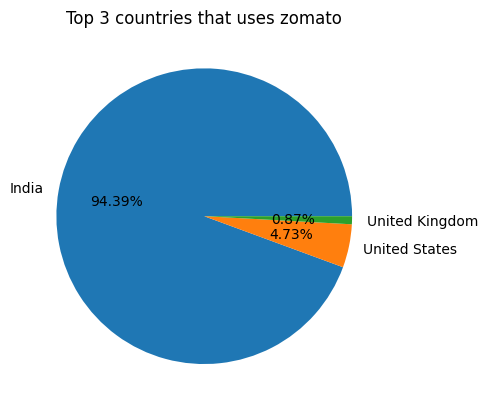

In [ ]:

## Pie Chart- Top 5 countries that uses zomato
plt.pie(country_names.values[:3],labels=country_names.index[:3],autopct='%1.2f%%')
plt.title('Top 3 countries that uses zomato')
plt.show()


Zomato have 94.39% users in India followed by US and UK with 4.73% and 0.87%


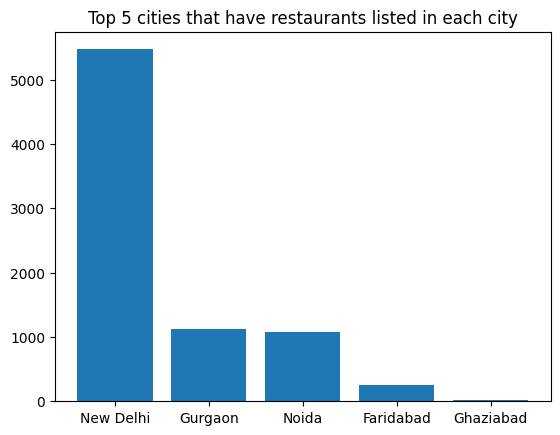

In [ ]:
# Total no. of listed restaurants in each city
city_names=final_df.City.value_counts()
plt.bar(city_names.index[:5],city_names.values[:5])
plt.title('Top 5 cities that have restaurants listed in each city')
plt.show()


In [ ]:
# Calculate the total number of restaurants
total_restaurants = city_names.sum()

# Calculate the percentage for each city
city_percentages = (city_names / total_restaurants) * 100

# Combine counts and percentages into a DataFrame for better display
city_summary = pd.DataFrame({
    'Count': city_names,
    'Percentage (%)': city_percentages.round(2) # Round to 2 decimal places
})

print("Percentage of restaurants per city:")
display(city_summary.head(5))

Percentage of restaurants per city:


,Count,Percentage (%)
City,,
New Delhi,5473,57.30
Gurgaon,1118,11.71
Noida,1080,11.31
Faridabad,251,2.63
Ghaziabad,25,0.26


In [ ]:
columns_to_delete = ['Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude']
df = df.drop (columns=columns_to_delete)
final_df=pd.merge(df,df_country,on='Country Code', how='left')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Cuisines              9542 non-null   object 
 5   Average Cost for two  9551 non-null   int64  
 6   Currency              9551 non-null   object 
 7   Has Table booking     9551 non-null   object 
 8   Has Online delivery   9551 non-null   object 
 9   Is delivering now     9551 non-null   object 
 10  Switch to order menu  9551 non-null   object 
 11  Price range           9551 non-null   int64  
 12  Aggregate rating      9551 non-null   float64
 13  Rating color          9551 non-null   object 
 14  Rating text           9551 non-null   object 
 15  Votes                

In [ ]:
# Convert the 'Aggregate rating' column to float32
final_df['Aggregate rating'] = df['Aggregate rating'].astype('float32')



In [ ]:
# Check for null values in the 'Cuisines' column
null_cuisines = final_df['Cuisines'].isnull()

# Count the number of null values in 'Cuisines'
num_null_cuisines = final_df['Cuisines'].isnull().sum()

# Print the boolean Series indicating null values
print("Boolean Series for null values in 'Cuisines':")
print(null_cuisines)

# Print the count of null values
print(f"\nNumber of null values in 'Cuisines': {num_null_cuisines}")

# Display rows where 'Cuisines' is null
print("\nRows where 'Cuisines' is null:")
print(final_df[null_cuisines])

Boolean Series for null values in 'Cuisines':
0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Name: Cuisines, Length: 9551, dtype: bool

Number of null values in 'Cuisines': 9

Rows where 'Cuisines' is null:
     Restaurant ID                 Restaurant Name  Country Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

     

As there is no particular related missing data and it is very small so we are deleting the missing records

In [ ]:

# Delete rows where 'Cuisines' is null
# Using inplace=True modifies the DataFrame directly
final_df.dropna(subset=['Cuisines'], inplace=True)

print("\nNumber of null values in 'Cuisines' after dropping:", final_df['Cuisines'].isnull().sum())


Number of null values in 'Cuisines' after dropping: 0


In [ ]:
if final_df.isnull().sum().sum() > 0:
  print('There are still null values in the DataFrame.')
else:
  print('No null values remaining in the DataFrame.')

No null values remaining in the DataFrame.


In [ ]:
# number of unique restaurants in dataframe

final_df['Restaurant ID'].nunique()

9542

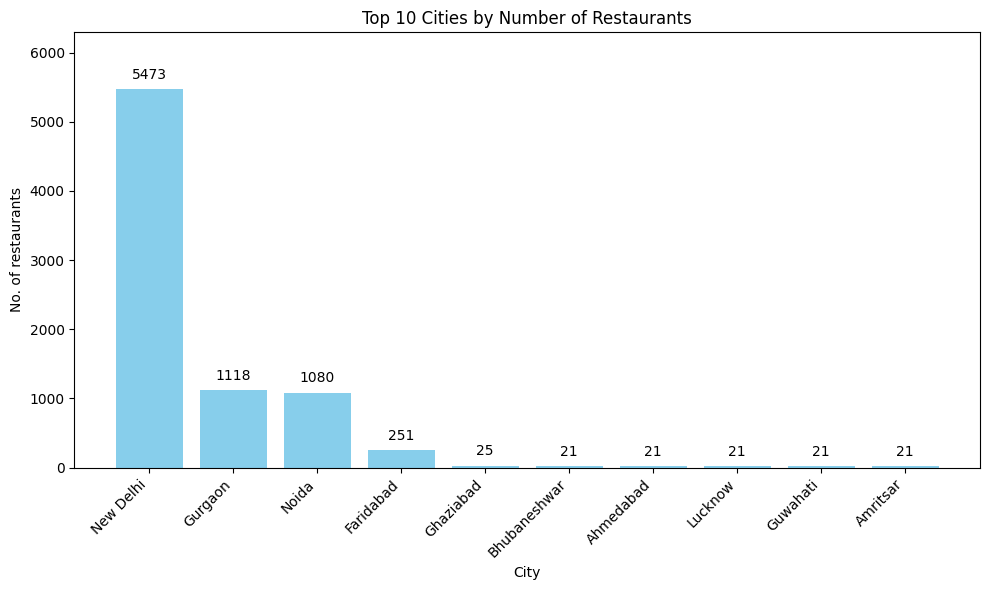

In [ ]:
top_10_cities = final_df['City'].value_counts().head(10)

plt.figure(figsize=(10, 6)) # Increased figure size for better readability and space for labels
bars = plt.bar(top_10_cities.index, top_10_cities.values, color='skyblue')

plt.xlabel('City')
plt.ylabel('No. of restaurants')
plt.title('Top 10 Cities by Number of Restaurants') # Added a title

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# --- Add values on top of each bar ---
# Determine the maximum height of any bar to adjust y-axis limit
max_height = top_10_cities.values.max()

# Set the y-axis limit to be slightly above the highest bar to accommodate the text
plt.ylim(0, max_height * 1.15) # Add 15% padding above the max bar height

for bar in bars:
    yval = bar.get_height()
    # plt.text(x_position, y_position, text_value, horizontal_alignment, vertical_alignment, font_size)
    plt.text(bar.get_x() + bar.get_width()/2, # X-position: center of the bar
             yval + (max_height * 0.02),     # Y-position: slightly above the bar (2% of max height)
             int(yval),                     # The text to display (the bar's height, as an integer)
             ha='center',                   # Center the text horizontally
             va='bottom',                   # Align text to the bottom of the y_position
             fontsize=10,                   # Font size for the text
             color='black')                 # Color of the text

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [ ]:
final_df['Cuisines_List'] = final_df['Cuisines'].str.split(',').apply(lambda x: [item.strip() for item in x])

#  Explode the lists into separate rows
#    This creates a new Series where each row represents a single cuisine type.
all_individual_cuisines = final_df['Cuisines_List'].explode()

# 3. Count the occurrences of each individual cuisine
cuisine_counts = all_individual_cuisines.value_counts()


# You can now display the top N cuisines, for example:
print("\nTop 10 most frequent cuisines:")
print(cuisine_counts.head(10))


Top 10 most frequent cuisines:
Cuisines_List
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


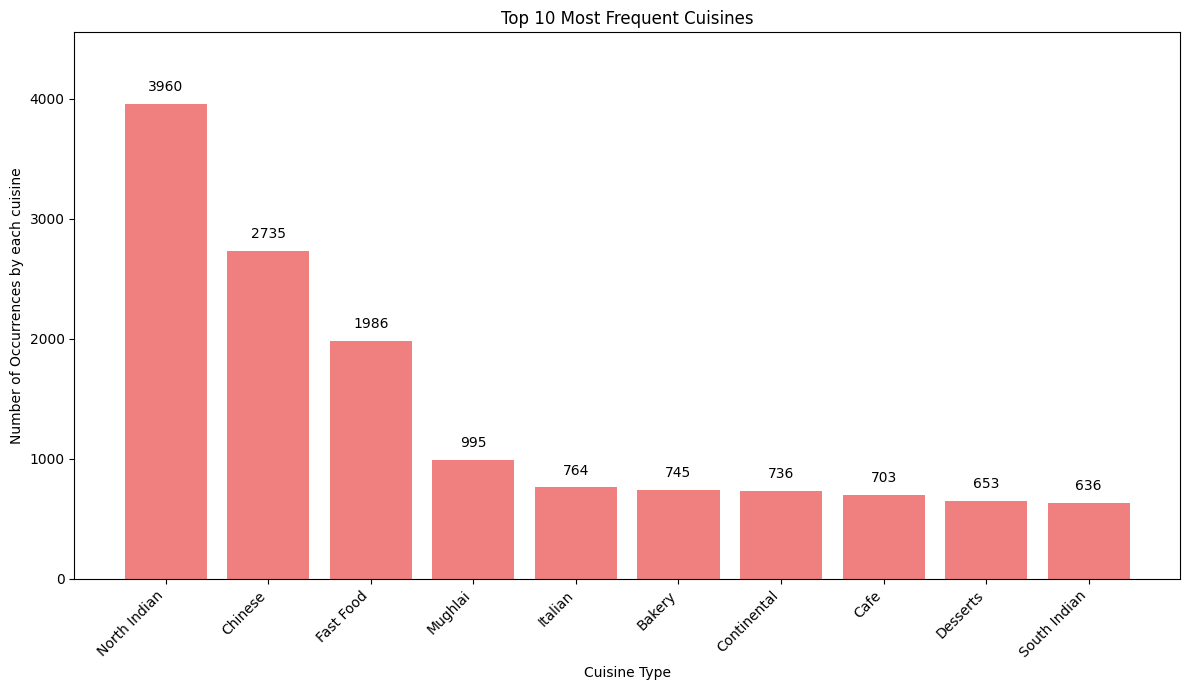

In [ ]:
# Get the top 10 individual cuisines
top_10_cuisines = cuisine_counts.head(10)

plt.figure(figsize=(12, 7)) # Increased figure size for better readability and space for labels
bars = plt.bar(top_10_cuisines.index, top_10_cuisines.values, color='lightcoral') # Changed color

plt.xlabel('Cuisine Type') # Changed X-axis label
plt.ylabel('Number of Occurrences by each cuisine') # Changed Y-axis label
plt.title('Top 10 Most Frequent Cuisines') # Changed plot title

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# --- Adding values on top of each bar ---
# Determine the maximum height of any bar to adjust y-axis limit
max_height = top_10_cuisines.values.max()

# Set the y-axis limit to be slightly above the highest bar to accommodate the text
plt.ylim(0, max_height * 1.15) # Add 15% padding above the max bar height

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, # X-position: center of the bar
             yval + (max_height * 0.02),     # Y-position: slightly above the bar (2% of max height)
             int(yval),                     # The text to display (the bar's height, as an integer)
             ha='center',                   # Center the text horizontally
             va='bottom',                   # Align text to the bottom of the y_position
             fontsize=10,                   # Font size for the text
             color='black')                 # Color of the text

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [ ]:
count_greater_than_0 = (final_df['Average Cost for two'] > 0).sum()

In [ ]:
# Get only restaurants where 'Average Cost for two' is greater than 0
restaurants_cost_gt_0 = final_df[final_df['Average Cost for two'] > 0].copy()


In [ ]:
basic_cost_details = restaurants_cost_gt_0['Average Cost for two'].agg(['min', 'max', 'mean', 'median'])

In [ ]:
basic_cost_details

,Average Cost for two
min,7.000000
max,800000.000000
mean,1202.216018
median,400.000000


In [ ]:
# Group by 'Country' and aggregate 'Average Cost for two'
grouped_cost_by_country = restaurants_cost_gt_0.groupby('Country')['Average Cost for two'].agg(['min', 'max', 'mean', 'median'])

print("\nAggregated 'Average Cost for two' by Country:")
print(grouped_cost_by_country)


Aggregated 'Average Cost for two' by Country:
                  min     max           mean    median
Country                                               
Australia           7     120      24.083333      20.0
Brazil             30     400     134.666667     100.0
Canada             25      70      36.250000      25.0
India              50    8000     624.019438     450.0
Indonesia       70000  800000  281190.476190  200000.0
New Zealand        20     200      69.750000      60.0
Phillipines       600    6000    1606.818182    1150.0
Qatar              50     550     223.750000     185.0
Singapore          20     500     155.750000      80.0
South Africa      110    3210     419.733333     340.0
Sri Lanka        1000    4500    2375.000000    2200.0
Turkey             30     400      84.852941      70.0
UAE                40     500     166.416667     145.0
United Kingdom     10     230      47.812500      40.0
United States      10     100      26.730310      25.0


In [ ]:

# Exchange rates to 1 Indian Rupee (INR)
# Source: Google Search as of July 2025 (as per context)
exchange_rates_to_inr = {
    'Australia': 56.33,         # AUD
    'Brazil': 15.70,            # BRL
    'Canada': 62.88,            # CAD
    'India': 1.00,              # INR (no conversion)
    'Indonesia': 0.0053,        # IDR
    'New Zealand': 52.31,       # NZD
    'Philippines': 1.52,        # PHP
    'Qatar': 23.50,             # QAR
    'Singapore': 67.31,         # SGD
    'South Africa': 4.87,       # ZAR
    'Sri Lanka': 0.29,          # LKR
    'Turkey': 2.15,             # TRY
    'UAE': 23.27,               # AED
    'United Kingdom': 117.84,   # GBP
    'United States': 85.53      # USD
}

# Create a new DataFrame for converted values
converted_cost_df = grouped_cost_by_country.copy()

# Apply the conversion
for country, rate in exchange_rates_to_inr.items():
    if country in converted_cost_df.index: # Check if country exists in our aggregated data
        converted_cost_df.loc[country] = converted_cost_df.loc[country] * rate

# Rename columns to reflect INR
converted_cost_df = converted_cost_df.add_suffix('_INR')

print("Aggregated 'Average Cost for two' by Country (Converted to INR):")
print(converted_cost_df)


Aggregated 'Average Cost for two' by Country (Converted to INR):
                min_INR  max_INR      mean_INR  median_INR
Country                                                   
Australia        394.31   6759.6   1356.614167     1126.60
Brazil           471.00   6280.0   2114.266667     1570.00
Canada          1572.00   4401.6   2279.400000     1572.00
India             50.00   8000.0    624.019438      450.00
Indonesia        371.00   4240.0   1490.309524     1060.00
New Zealand     1046.20  10462.0   3648.622500     3138.60
Phillipines      600.00   6000.0   1606.818182     1150.00
Qatar           1175.00  12925.0   5258.125000     4347.50
Singapore       1346.20  33655.0  10483.532500     5384.80
South Africa     535.70  15632.7   2044.101333     1655.80
Sri Lanka        290.00   1305.0    688.750000      638.00
Turkey            64.50    860.0    182.433824      150.50
UAE              930.80  11635.0   3872.515833     3374.15
United Kingdom  1178.40  27103.2   5634.225000    

In [ ]:
# 2. Revert to Original Local Currency Costs
local_cost_df = converted_cost_df.copy()
for country, rate in exchange_rates_to_inr.items():
    if country in local_cost_df.index:
        local_cost_df.loc[country] = local_cost_df.loc[country] / rate

# 3. Define PPP Conversion Factors
# Source: World Bank, International Comparison Program (2021 data).
# Values are Local Currency Units (LCU) per international dollar.
ppp_lcu_per_usd = {
    'Australia': 1.63, 'Brazil': 3.16, 'Canada': 1.29, 'India': 24.35,
    'Indonesia': 4779.67, 'New Zealand': 1.77, 'Philippines': 18.27,
    'Qatar': 2.65, 'Singapore': 0.81, 'South Africa': 7.23,
    'Sri Lanka': 62.38, 'Turkey': 4.65, 'UAE': 2.97,
    'United Kingdom': 0.73, 'United States': 1.00
}

# 4. Calculate Final Costs in INR based on PPP
ppp_inr_per_usd = ppp_lcu_per_usd['India']
ppp_converted_df = local_cost_df.copy()

for country, local_ppp in ppp_lcu_per_usd.items():
    if country in ppp_converted_df.index:
        ppp_rate_to_inr = ppp_inr_per_usd / local_ppp
        ppp_converted_df.loc[country] = ppp_converted_df.loc[country] * ppp_rate_to_inr

# Rename columns to reflect the new conversion
ppp_converted_df = ppp_converted_df.add_suffix('_PPP').round(2)

# 5. Display the Final PPP-Adjusted DataFrame
print("--- 'Average Cost for two' by Country (Converted to INR using PPP) ---")
print(ppp_converted_df)

--- 'Average Cost for two' by Country (Converted to INR using PPP) ---
                min_INR_PPP  max_INR_PPP  mean_INR_PPP  median_INR_PPP
Country                                                               
Australia            104.57      1792.64        359.77          298.77
Brazil               231.17      3082.28       1037.70          770.57
Canada               471.90      1321.32        684.25          471.90
India                 50.00      8000.00        624.02          450.00
Indonesia            356.61      4075.60       1432.52         1018.90
New Zealand          275.14      2751.41        959.56          825.42
Phillipines          600.00      6000.00       1606.82         1150.00
Qatar                459.43      5053.77       2055.97         1699.91
Singapore            601.23     15030.86       4682.11         2404.94
South Africa         370.47     10811.00       1413.62         1145.09
Sri Lanka            390.35      1756.57        927.08          858.77
Turkey

Plot saved as 'min_max_ppp_cost_comparison_from_df.png'


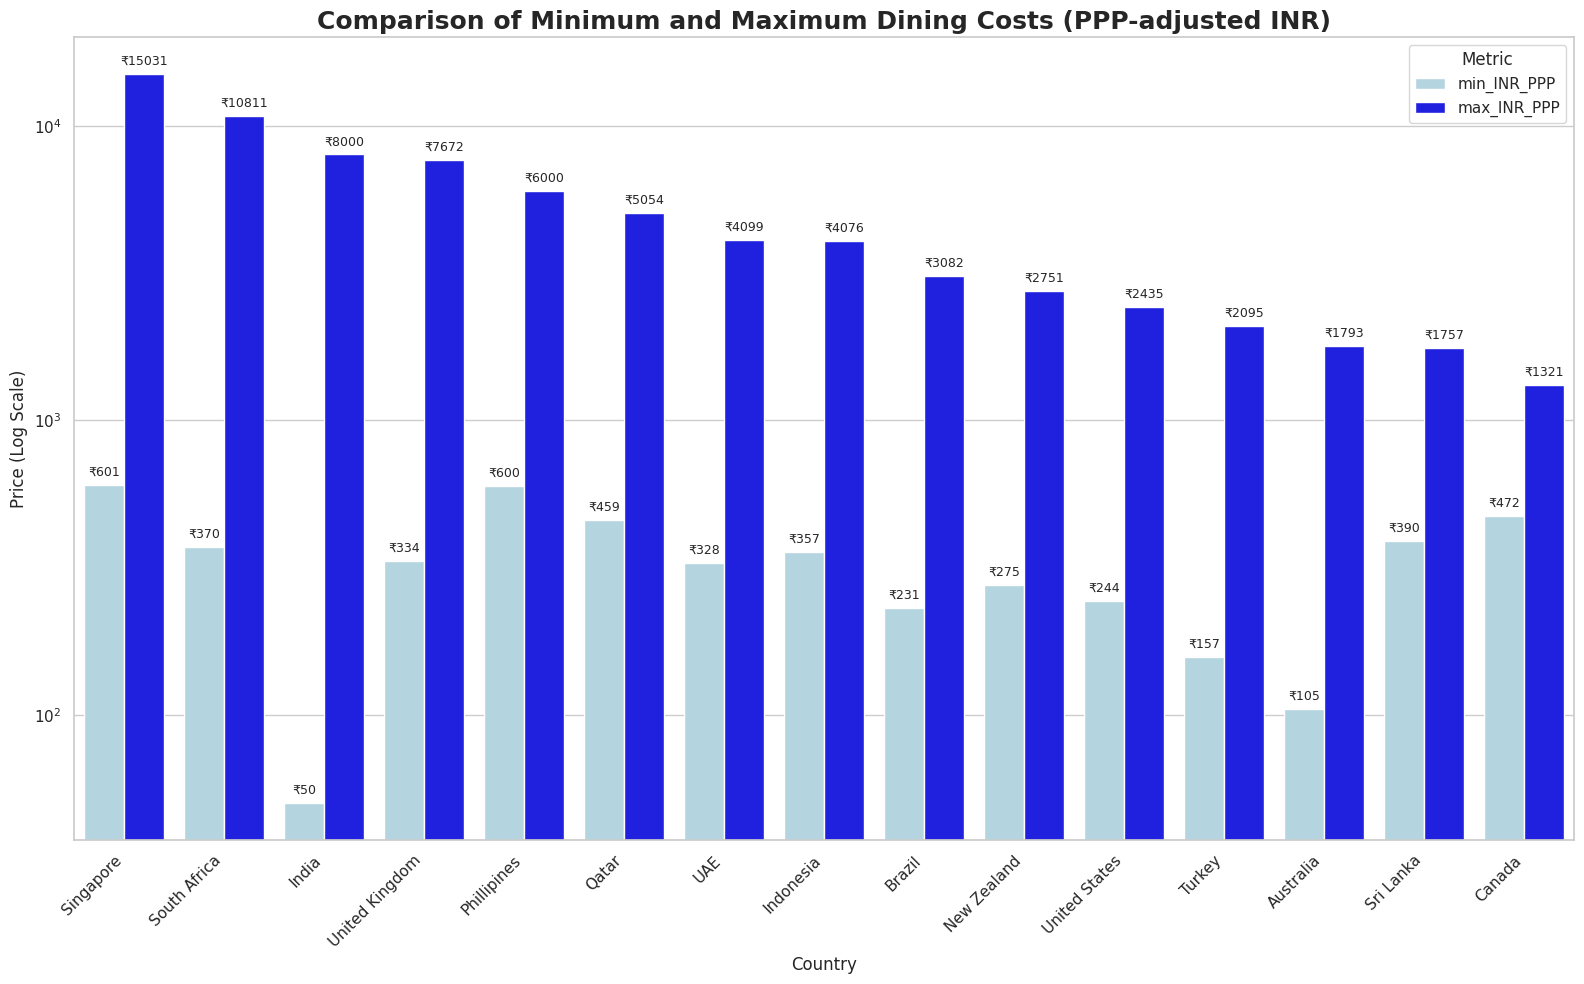

In [ ]:

# Sort the data by the max price to make the plot readable.
df_sorted = ppp_converted_df.sort_values('max_INR_PPP', ascending=False)

# Melt the dataframe to a "long" format suitable for seaborn
df_melted = df_sorted.reset_index().melt(
    id_vars='Country',
    value_vars=['min_INR_PPP', 'max_INR_PPP'],
    var_name='Metric',
    value_name='Price (PPP-adjusted INR)'
)

# 2. Create the plot
plt.figure(figsize=(16, 10))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    data=df_melted,
    x='Country',
    y='Price (PPP-adjusted INR)',
    hue='Metric',
    palette={'min_INR_PPP': 'lightblue', 'max_INR_PPP': 'blue'}
)

# 3. Customize the plot for readability
ax.set_title('Comparison of Minimum and Maximum Dining Costs (PPP-adjusted INR)', fontsize=18, weight='bold')
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Price (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Use a logarithmic scale for the y-axis to properly visualize the large differences
ax.set_yscale('log')

# Add labels to the bars for clarity
for p in ax.patches:
    if p.get_height() > 0.1: # Avoid labeling tiny bars
        ax.annotate(f"₹{p.get_height():.0f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=9)

# Ensure everything fits and save the figure
plt.tight_layout()
plt.savefig("min_max_ppp_cost_comparison_from_df.png", dpi=300)

print("Plot saved as 'min_max_ppp_cost_comparison_from_df.png'")

In [ ]:
# cities avg in india where average cost is higher than country avg

# Step 1: Filter only for India
india_df = final_df[final_df['Country'] == 'India'].copy()

# Step 2: Calculate the overall average dining cost in India
average_cost_india = india_df['Average Cost for two'].mean()

print(f"Overall average dining cost in India: {average_cost_india:.2f}\n")

# Step 3: Get cities in India where average dining cost is greater than the overall average in India

city_avg_india = india_df.groupby('City')['Average Cost for two'].mean().round()

# Filter cities in India where the average cost is higher than the overall average in India
cities_with_higher_avg_cost_in_india = city_avg_india[city_avg_india > average_cost_india].sort_values(ascending=False)


# Step 4: Display the result
print("Cities in India where average dining cost is higher than the overall average in India:")
print(cities_with_higher_avg_cost_in_india)

Overall average dining cost in India: 623.37

Cities in India where average dining cost is higher than the overall average in India:
City
Panchkula       2000.0
Hyderabad       1361.0
Pune            1338.0
Jaipur          1310.0
Kolkata         1272.0
Bangalore       1232.0
Goa             1175.0
Ludhiana        1160.0
Chennai         1085.0
Chandigarh      1072.0
Mumbai          1072.0
Agra            1065.0
Indore           960.0
Kanpur           915.0
Lucknow          860.0
Ahmedabad        857.0
Puducherry       842.0
Secunderabad     825.0
Guwahati         821.0
Vadodara         820.0
Mysore           814.0
Surat            812.0
Patna            798.0
Coimbatore       782.0
Mangalore        782.0
Vizag            780.0
Ranchi           735.0
Kochi            730.0
Dehradun         728.0
Nagpur           715.0
Gurgaon          714.0
Bhubaneshwar     679.0
Nashik           662.0
Name: Average Cost for two, dtype: float64


In [ ]:
number_of_cities_in_india = india_df['City'].nunique()

number_of_cities_with_higher_avg_cost_in_india = cities_with_higher_avg_cost_in_india.index.nunique()

print(f"Total number of cities in India in the dataset: {number_of_cities_in_india}")
print(f"Number of cities in India with higher than average dining cost: {number_of_cities_with_higher_avg_cost_in_india}")

print(f"Percentage of cities in India with higher than average dining cost: {number_of_cities_with_higher_avg_cost_in_india / number_of_cities_in_india * 100:.2f}%")

Total number of cities in India in the dataset: 43
Number of cities in India with higher than average dining cost: 33
Percentage of cities in India with higher than average dining cost: 76.74%


In [ ]:
# List of the columns you want to check
columns_to_check = [
    'Has Table booking',
    'Has Online delivery',
    'Is delivering now',
    'Switch to order menu'
]


# Loop through the list of columns
for column in columns_to_check:
    # Check if the column exists in the DataFrame
    if column in final_df.columns:
        print(f"\nValue counts for '{column}':")
        # Print the value_counts for the column
        print(final_df[column].value_counts())
        print("-" * 30)
    else:
        # If the column doesn't exist, print a message
        print(f"\nColumn '{column}' not found in the DataFrame.")
        print("-" * 30)



Value counts for 'Has Table booking':
Has Table booking
No     8384
Yes    1158
Name: count, dtype: int64
------------------------------

Value counts for 'Has Online delivery':
Has Online delivery
No     7091
Yes    2451
Name: count, dtype: int64
------------------------------

Value counts for 'Is delivering now':
Is delivering now
No     9508
Yes      34
Name: count, dtype: int64
------------------------------

Value counts for 'Switch to order menu':
Switch to order menu
No    9542
Name: count, dtype: int64
------------------------------


In [ ]:
#cities by number of highly-rated restaurants (rating ≥ 4)


highly_rated_restaurants = final_df[final_df['Aggregate rating'] >= 4]
city_counts = highly_rated_restaurants['City'].value_counts()

top_cities = city_counts.reset_index()
top_cities.columns = ['City', 'Number of Highly-Rated Restaurants']

# If you want to see only the top N cities, e.g., top 5
print("\nTop 5 cities:")
print(top_cities.head(3))


Top 5 cities:
        City  Number of Highly-Rated Restaurants
0  New Delhi                                 328
1    Gurgaon                                  95
2      Noida                                  29


In [ ]:
#total restaurants having rating >= 4
city_counts.sum()

# Calculate the percentage for each city
cp = (city_counts / city_counts.sum()) * 100

# Combine counts and percentages into a DataFrame for better display
city_rating = pd.DataFrame({
    'Count': city_counts,
    'Percentage (%)': cp.round(2) # Round to 2 decimal places
})

print("Percentage of restaurants per city:")
display(city_rating.head().reset_index())

Percentage of restaurants per city:


,City,Count,Percentage (%)
0,New Delhi,328,23.80
1,Gurgaon,95,6.89
2,Noida,29,2.10
3,Abu Dhabi,19,1.38
4,Rio de Janeiro,19,1.38


<Axes: xlabel='City', ylabel='Count'>

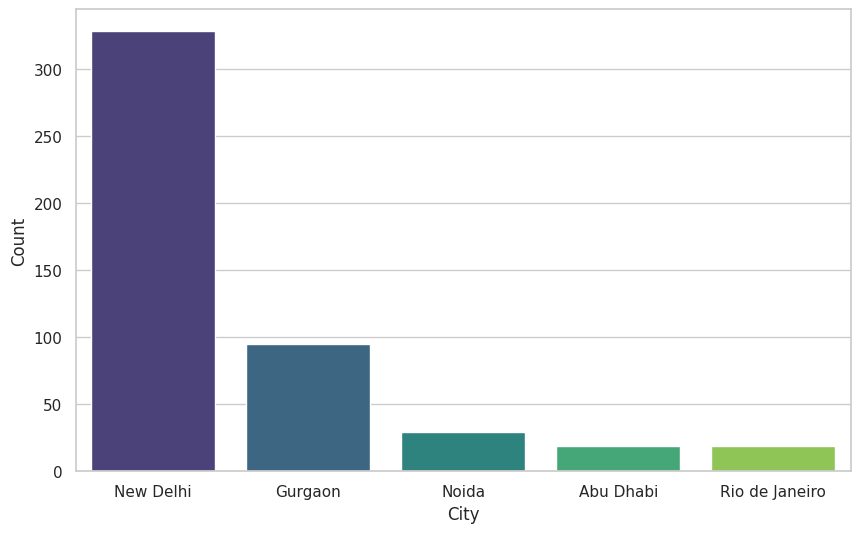

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Count', data=city_rating.head().reset_index(), palette='viridis')

In [ ]:
# total restaurants in each city vs average rating >= 4

joined_df = pd.merge(top_cities, city_names, on='City', how='inner')
joined_df['% of Restaurants'] = (joined_df['Number of Highly-Rated Restaurants'] / joined_df['count']).round(2)
joined_df.sort_values(by='% of Restaurants', ascending=False)

joined_df[joined_df['% of Restaurants'] > 0.99 ].sum()

,0
City,JohannesburgTaguig CityMandaluyong CityPasay C...
Number of Highly-Rated Restaurants,45
count,45
% of Restaurants,26.0


26% of cities have 100% restaurants ratings greater than 4


In [ ]:
joined_df.head()

,City,Number of Highly-Rated Restaurants,count,% of Restaurants
0,New Delhi,328,5473,0.06
1,Gurgaon,95,1118,0.08
2,Noida,29,1080,0.03
3,Abu Dhabi,19,20,0.95
4,Rio de Janeiro,19,20,0.95


In [ ]:
# countries have the best-rated restaurants on average

average_ratings_by_country = final_df.groupby('Country')['Aggregate rating'].mean().sort_values(ascending=False).round(2)

print("Countries with the best-rated restaurants on average:")
print(average_ratings_by_country)


Countries with the best-rated restaurants on average:
Country
Phillipines       4.47
Turkey            4.30
Indonesia         4.30
New Zealand       4.26
UAE               4.23
South Africa      4.21
United Kingdom    4.09
Qatar             4.06
United States     4.01
Sri Lanka         3.87
Brazil            3.76
Australia         3.66
Canada            3.58
Singapore         3.58
India             2.52
Name: Aggregate rating, dtype: float32


In [ ]:
# avg  rating
avg_rating = final_df['Aggregate rating'].mean()
avg_rating

np.float32(2.665238)

In [ ]:
# countries avg rating greater than overall avg rating


average_ratings_by_country[average_ratings_by_country.values > avg_rating]

,Aggregate rating
Country,
Phillipines,4.47
Turkey,4.30
Indonesia,4.30
New Zealand,4.26
UAE,4.23
South Africa,4.21
United Kingdom,4.09
Qatar,4.06
United States,4.01


In [ ]:
# Where are restaurants with the most votes located

import pandas as pd


# Aggregate votes by City
votes_by_city = final_df.groupby('City')['Votes'].sum().reset_index()
votes_by_city.rename(columns={'Votes': 'Total Votes'}, inplace=True)
votes_by_city_sorted = votes_by_city.sort_values(by='Total Votes', ascending=False)

print("Top Cities by Total Votes:")
print(votes_by_city_sorted.head())

print("\n------------------------------------------------------\n")

# Aggregate votes by Country
votes_by_country = final_df.groupby('Country')['Votes'].sum().reset_index()
votes_by_country.rename(columns={'Votes': 'Total Votes'}, inplace=True)
votes_by_country_sorted = votes_by_country.sort_values(by='Total Votes', ascending=False)

print("Top Countries by Total Votes:")
print(votes_by_country_sorted.head())

Top Cities by Total Votes:
         City  Total Votes
87  New Delhi       628340
50    Gurgaon       132160
88      Noida        73488
14  Bangalore        56115
63    Kolkata        44593

------------------------------------------------------

Top Countries by Total Votes:
           Country  Total Votes
3            India      1187163
14   United States       183122
12             UAE        29611
9     South Africa        18910
13  United Kingdom        16439


In [ ]:
#Top most rated cusines globally

# Step 1: Split the 'Cuisines' column and expand to new rows
# Create a temporary list of dictionaries where each dictionary represents a single cuisine-rating pair
temp_data = []
for index, row in final_df.iterrows():
    cuisines = [c.strip() for c in row['Cuisines'].split(',')]
    for cuisine in cuisines:
        temp_data.append({'Cuisine': cuisine, 'Aggregate rating': row['Aggregate rating']})

# Create a new DataFrame from the temporary data
expanded_df = pd.DataFrame(temp_data)

# Step 2: Group by the new 'Cuisine' column and calculate the average of 'Aggregate rating'
average_ratings_by_cuisine = expanded_df.groupby('Cuisine')['Aggregate rating'].mean()

# Step 3: Sort the results in descending order
best_rated_cuisines = average_ratings_by_cuisine.sort_values(ascending=False).round(2)

# If you want to see only the top N cuisines (e.g., top 5)
print("\nTop 5 cuisines with highest average ratings:")
print(best_rated_cuisines.head(5))


Top 5 cuisines with highest average ratings:
Cuisine
Sunda        4.90
Bí_rek       4.70
Taiwanese    4.65
Ramen        4.50
Dim Sum      4.47
Name: Aggregate rating, dtype: float64


In [ ]:
#Top most rated cusines in india

india_df = final_df[final_df['Country'] == 'India'].copy()
# Step 1: Split the 'Cuisines' column and expand to new rows
# Create a temporary list of dictionaries where each dictionary represents a single cuisine-rating pair
temp_data = []
for index, row in india_df.iterrows():
    cuisines = [c.strip() for c in row['Cuisines'].split(',')]
    for cuisine in cuisines:
        temp_data.append({'Cuisine': cuisine, 'Aggregate rating': row['Aggregate rating']})

# Create a new DataFrame from the temporary data
expanded_df = pd.DataFrame(temp_data)

# Step 2: Group by the new 'Cuisine' column and calculate the average of 'Aggregate rating'
average_ratings_by_cuisine = expanded_df.groupby('Cuisine')['Aggregate rating'].mean()

# Step 3: Sort the results in descending order
best_rated_cuisines = average_ratings_by_cuisine.sort_values(ascending=False).round(2)

# If you want to see only the top N cuisines
print("\nTop 5 cuisines with highest average ratings in india:")
print(best_rated_cuisines.head(5))




Top 5 cuisines with highest average ratings in india:
Cuisine
Persian           4.60
German            4.35
Modern Indian     4.28
Charcoal Grill    4.18
Parsi             4.10
Name: Aggregate rating, dtype: float64


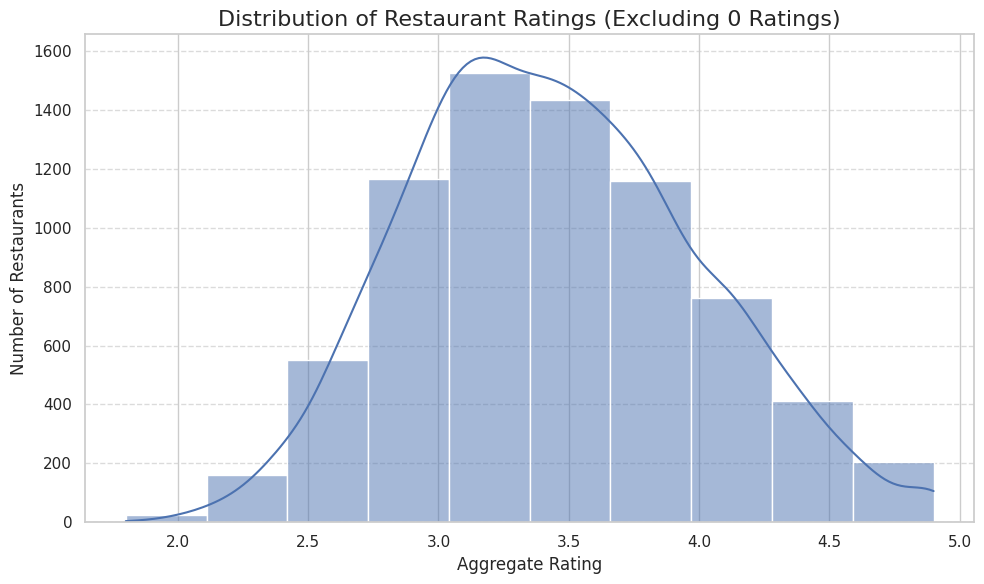

In [ ]:
# distribution of restaurant ratings


# Filter out rows where 'Aggregate rating' is 0
filtered_df = final_df[final_df['Aggregate rating'] > 0].copy()


# Plotting the distribution of restaurant ratings (excluding 0 ratings)
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['Aggregate rating'], bins=10, kde=True, palette='viridis')
plt.title('Distribution of Restaurant Ratings (Excluding 0 Ratings)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#  percentage of restaurants are unrated (rating = 0)
total_restaurants = len(final_df)

# Count the number of restaurants with 0 rating
unrated_restaurants_count = (final_df['Aggregate rating'] == 0).sum()

# Calculate the percentage of unrated restaurants
if total_restaurants > 0:
    percentage_unrated = (unrated_restaurants_count / total_restaurants) * 100
else:
    percentage_unrated = 0

print(f"Total number of restaurants: {total_restaurants}")
print(f"Number of unrated restaurants (rating = 0): {unrated_restaurants_count}")
print(f"Percentage of unrated restaurants: {percentage_unrated:.2f}%")

Total number of restaurants: 9542
Number of unrated restaurants (rating = 0): 2148
Percentage of unrated restaurants: 22.51%


Correlation between Aggregate Rating and Votes: 0.409



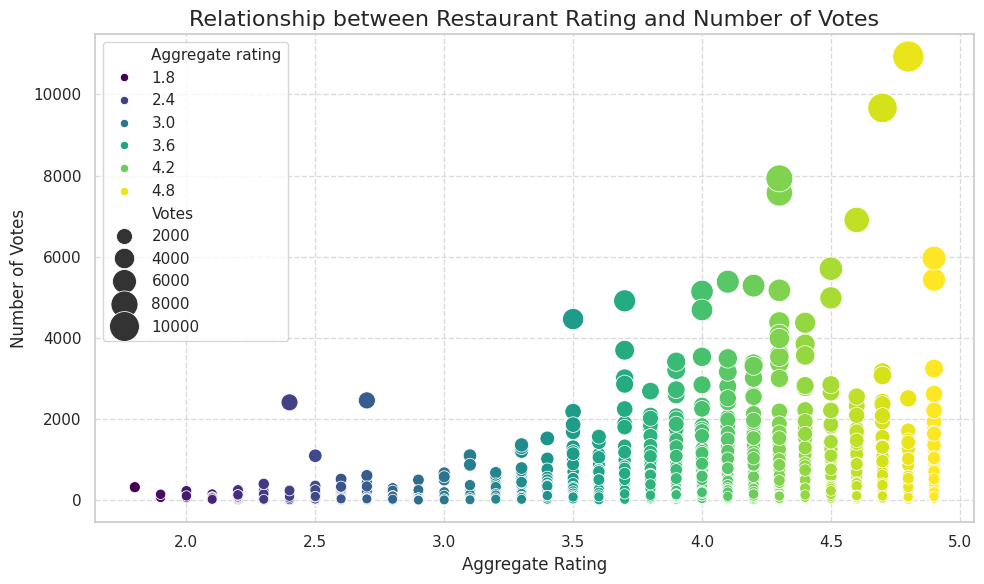

In [ ]:
# Do high-rated restaurants tend to have more votes .?

# Filter out restaurants with 0 rating
filtered_df = final_df[final_df['Aggregate rating'] > 0].copy()

# Calculate the Pearson correlation coefficient between 'Aggregate rating' and 'Votes'
correlation = filtered_df['Aggregate rating'].corr(filtered_df['Votes'])

print(f"Correlation between Aggregate Rating and Votes: {correlation:.3f}\n")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aggregate rating', y='Votes', data=filtered_df, hue='Aggregate rating', size='Votes', sizes=(50, 500), palette='viridis')
plt.title('Relationship between Restaurant Rating and Number of Votes', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Ratings by Table Booking ###
Average Aggregate Rating:
Has Table booking
No     2.557956
Yes    3.441969
Name: Aggregate rating, dtype: float32


### Votes by Online Delivery ###
Average Votes:
Has Online delivery
No     137.922014
Yes    211.307222
Name: Votes, dtype: float64

Total Votes:
Has Online delivery
No     978005
Yes    517914
Name: Votes, dtype: int64


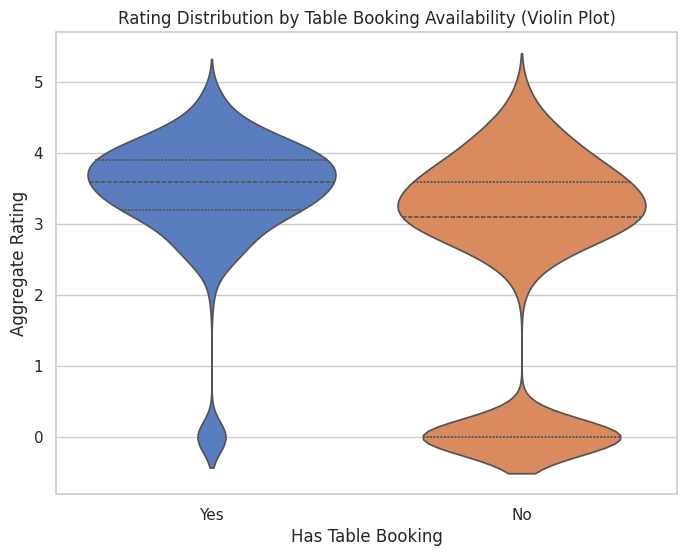

In [ ]:
#Do restaurants with table booking options have higher ratings


# --- Numerical Analysis for Ratings by Table Booking ---
print("### Ratings by Table Booking ###")
mean_ratings = final_df.groupby('Has Table booking')['Aggregate rating'].mean()
print("Average Aggregate Rating:")
print(mean_ratings)
print("\n" + "="*50 + "\n") # Separator for clarity

# --- Numerical Analysis for Votes by Online Delivery ---
print("### Votes by Online Delivery ###")
# Calculate average votes
mean_votes = final_df.groupby('Has Online delivery')['Votes'].mean()
print("Average Votes:")
print(mean_votes)

# Calculate total votes
total_votes = final_df.groupby('Has Online delivery')['Votes'].sum()
print("\nTotal Votes:")
print(total_votes)
# Set plot style
sns.set_style("whitegrid")


plt.figure(figsize=(8, 6))
sns.violinplot(x='Has Table booking', y='Aggregate rating', data=final_df, palette='muted', inner='quartile')
plt.title('Rating Distribution by Table Booking Availability (Violin Plot)')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.savefig('rating_violin_plot.png')





Average Aggregate Rating by Price Range:
   Price range  Aggregate rating
0            1          1.997476
1            2          2.941054
2            3          3.682634
3            4          3.817918


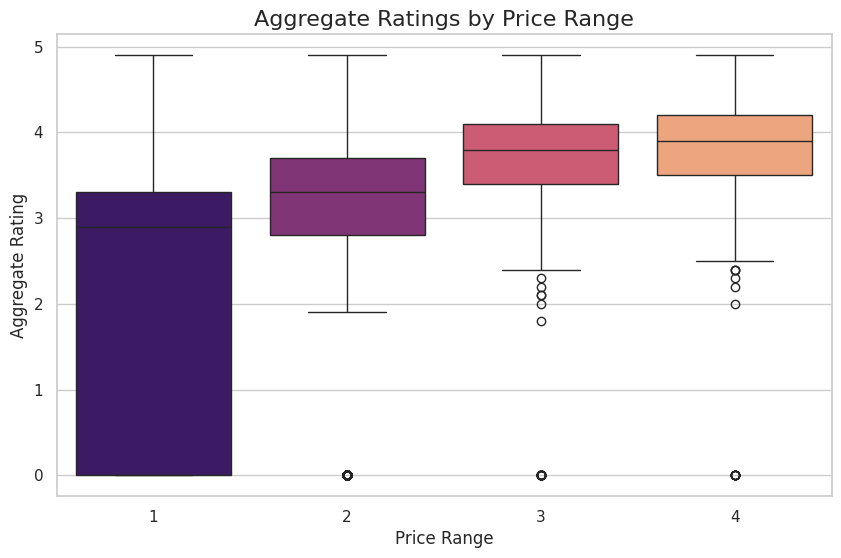

In [ ]:
#How do ratings vary by price range?

# --- Visual Analysis: Box Plot ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.boxplot(x='Price range', y='Aggregate rating', data=final_df, palette='magma')
plt.title('Aggregate Ratings by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)


# --- Numerical Analysis ---
# Calculate the mean rating for each price range
mean_rating_by_price = final_df.groupby('Price range')['Aggregate rating'].mean().reset_index()
print("Average Aggregate Rating by Price Range:")
print(mean_rating_by_price)


In [ ]:
#Which rating color is most frequent and in which cities

# --- Find the most frequent rating color ---
most_frequent_color = final_df['Rating color'].mode()[0]
print(f"The most frequent rating color is: {most_frequent_color}\n")

# --- Filter the dataframe for the most frequent rating color ---
df_top_color = final_df[final_df['Rating color'] == most_frequent_color]

# --- Find the top cities for that color ---
top_cities_for_color = df_top_color['City'].value_counts()

print(f"Top cities where the rating color '{most_frequent_color}' is most frequent:")
print(top_cities_for_color)

The most frequent rating color is: Orange

Top cities where the rating color 'Orange' is most frequent:
City
New Delhi         2495
Gurgaon            504
Noida              449
Faridabad          123
Ghaziabad           18
Aurangabad          16
Allahabad           15
Ranchi              11
Singapore            9
Patna                9
Nashik               8
Varanasi             8
Brasí_lia            6
Dubuque              5
Albany               5
Amritsar             5
Kanpur               3
Manchester           3
Sí£o Paulo           2
Colombo              2
Doha                 2
Birmingham           2
Puducherry           2
Chandigarh           2
Valdosta             2
Mysore               2
Bhopal               2
Cochrane             1
Columbus             1
Davenport            1
Consort              1
Balingup             1
Paynesville          1
Des Moines           1
Mayfield             1
Winchester Bay       1
Waterloo             1
Potrero              1
Savannah         

In [ ]:
'''🛵 Ordering & Delivery
How many restaurants offer online delivery?
Does offering online delivery correlate with higher ratings or votes?
What is the distribution of restaurants currently delivering (Is delivering now)?
Is there a relationship between delivery availability and cost?'''

final_df.groupby('Has Online delivery')['Aggregate rating'].mean()

,Aggregate rating
Has Online delivery,
No,2.463517
Yes,3.248837


In [ ]:
final_df.groupby('Has Online delivery')['Votes'].mean()

,Votes
Has Online delivery,
No,137.922014
Yes,211.307222


In [ ]:
# --- Filter for India ---

# --- Numerical Analysis ---
print("### Average Cost by Online Delivery Availability ###")
mean_cost_by_delivery = india_df.groupby('Has Online delivery')['Average Cost for two'].mean()
print(mean_cost_by_delivery)

### Average Cost by Online Delivery Availability ###
Has Online delivery
No     599.446139
Yes    684.874123
Name: Average Cost for two, dtype: float64


In [ ]:
'''🪑 Table Booking & Dining Experience
What proportion of restaurants offer table booking?
Do restaurants with table booking have higher price ranges?
Are table-booking restaurants more likely to be high-end (rating ≥ 4.5)?'''

# --- 1. Proportion of restaurants offering table booking ---
print("--- 1. Proportion of Restaurants Offering Table Booking ---")
booking_proportion = india_df['Has Table booking'].value_counts(normalize=True) * 100
print(booking_proportion)


# --- 2. Relationship between table booking and price range ---
print("\n--- 2. Table Booking vs. Price Range ---")
# Calculate average price range
avg_price_by_booking = india_df.groupby('Has Table booking')['Price range'].mean()
print("\nAverage Price Range by Table Booking Availability:")
print(avg_price_by_booking)

# --- 3. Likelihood of table-booking restaurants being high-end ---
print("\n--- 3. Likelihood of Table-Booking Restaurants Being High-End (Rating >= 4.5) ---")
india_df['is_high_end'] = india_df['Aggregate rating'] >= 4.5
high_end_likelihood = india_df.groupby('Has Table booking')['is_high_end'].mean() * 100
print(high_end_likelihood)


--- 1. Proportion of Restaurants Offering Table Booking ---
Has Table booking
No     87.159038
Yes    12.840962
Name: proportion, dtype: float64

--- 2. Table Booking vs. Price Range ---

Average Price Range by Table Booking Availability:
Has Table booking
No     1.531494
Yes    3.012601
Name: Price range, dtype: float64

--- 3. Likelihood of Table-Booking Restaurants Being High-End (Rating >= 4.5) ---
Has Table booking
No     1.219997
Yes    2.160216
Name: is_high_end, dtype: float64




--- Combined Service Analysis (Booking & Delivery) ---

Mean Rating by Service Combination:

service_combo
Booking & Delivery    4.800000
Booking Only          4.500000
Delivery Only         3.966667
Neither               3.350000
Name: Aggregate rating, dtype: float64


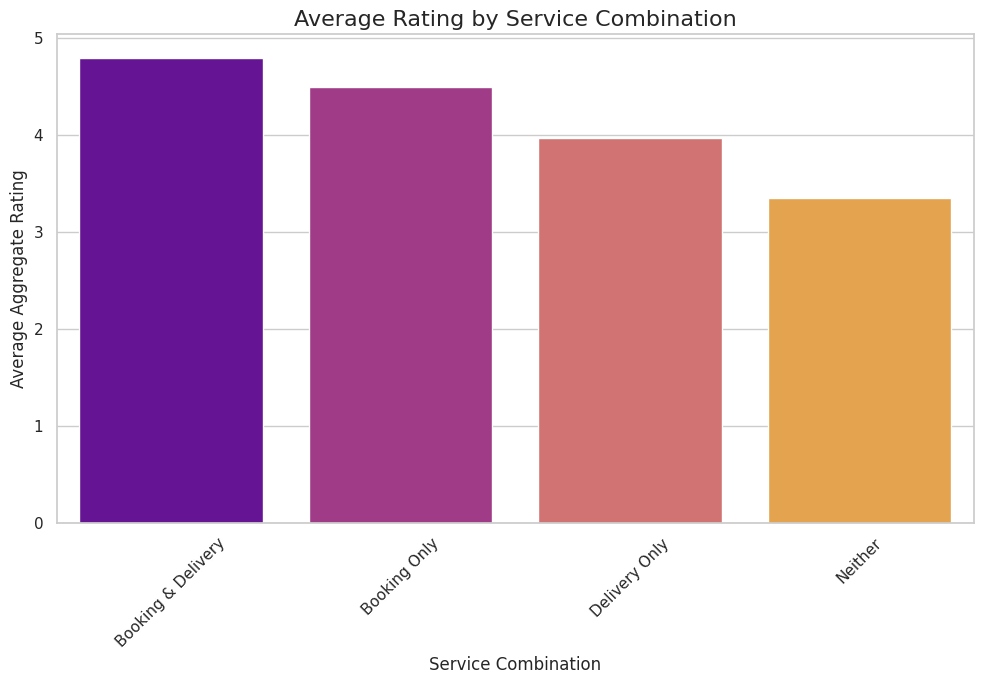

In [ ]:
'''📦 Operational Characteristics'''

#  Analyze combined effect of Table Booking and Online Delivery ---
print("\n\n--- Combined Service Analysis (Booking & Delivery) ---\n")

def get_service_combo(row):
    has_booking = row['Has Table booking'] == 'Yes'
    has_delivery = row['Has Online delivery'] == 'Yes'
    if has_booking and has_delivery:
        return 'Booking & Delivery'
    elif has_booking:
        return 'Booking Only'
    elif has_delivery:
        return 'Delivery Only'
    else:
        return 'Neither'

india_df['service_combo'] = india_df.apply(get_service_combo, axis=1)

# Calculate mean rating by the new combo feature
rating_by_combo = india_df.groupby('service_combo')['Aggregate rating'].mean().sort_values(ascending=False)

print("Mean Rating by Service Combination:\n")
print(rating_by_combo)

# Visualize the result
plt.figure(figsize=(10, 7))
sns.barplot(x=rating_by_combo.index, y=rating_by_combo.values, palette='plasma', order=rating_by_combo.index)
plt.title('Average Rating by Service Combination', fontsize=16)
plt.xlabel('Service Combination', fontsize=12)
plt.ylabel('Average Aggregate Rating', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rating_by_service_combo.png')


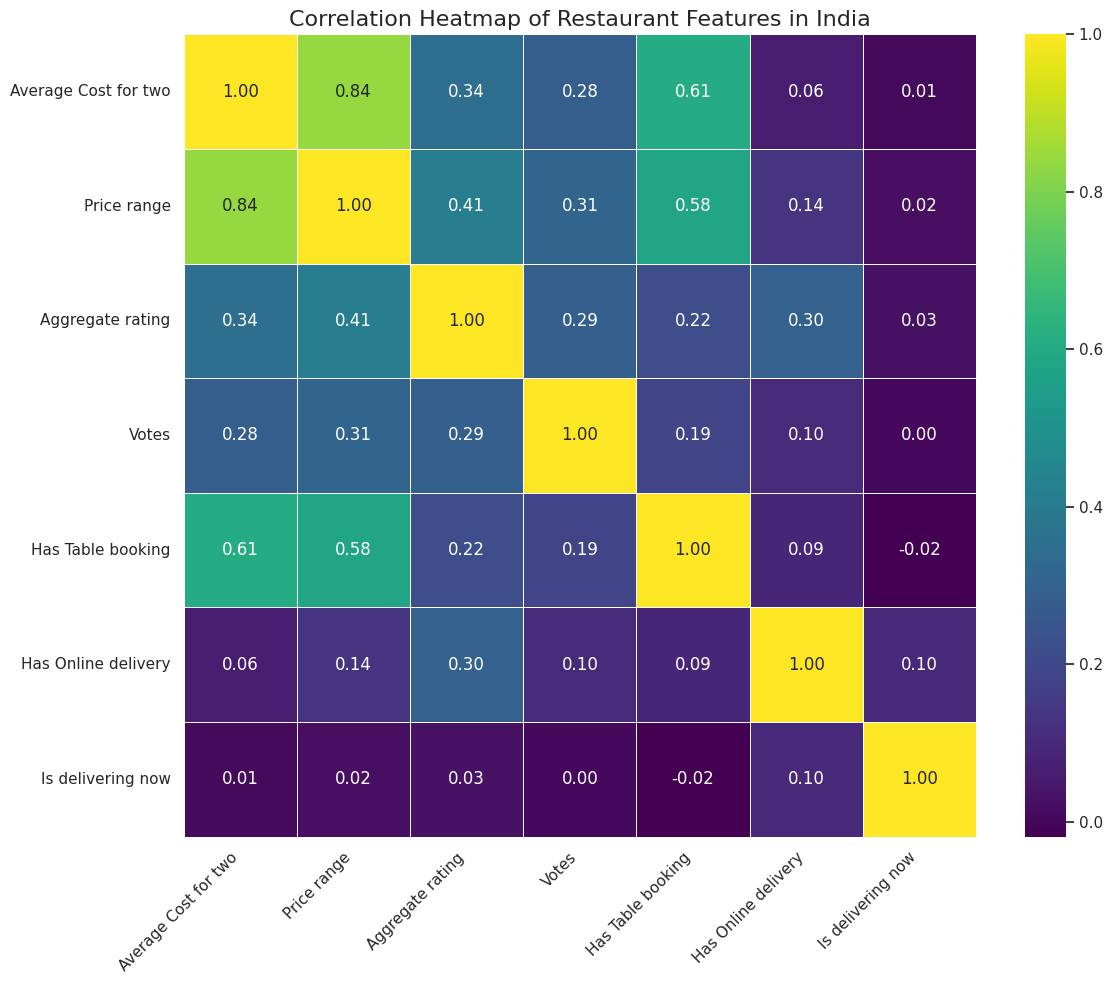

In [ ]:
# --- Correlation Analysis ---

# Filter for India
ind_df = final_df[final_df['Country'] == 'India'].copy()

# Select columns for correlation analysis
corr_df = ind_df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes', 'Has Table booking', 'Has Online delivery','Is delivering now']]

# Convert Yes/No to 1/0 for correlation calculation
for col in ['Has Table booking', 'Has Online delivery', 'Is delivering now']:
    corr_df[col] = corr_df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# --- Heatmap Visualization ---
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Restaurant Features in India', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap_india.png')
plt.show()